## extract needed data - Physician or ED notes, last entry per (person, note type) pair

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import dizzy_util as util
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', 150)

In [3]:
dataset = util.extractDataset("B00_ML4TrgPos_", {"WithRole", "AllMed", "Vital", "HF", "DispensedDrug"})

C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_01_04_cohort,BASE TABLE
1,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_05_04_Rad,BASE TABLE
2,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_30_Note_WithRole,BASE TABLE
3,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_30_Note,BASE TABLE
4,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_04_04_Lab,BASE TABLE
5,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_04_RxOutpat,BASE TABLE
6,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_07_NonVAMed,BASE TABLE
7,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_05_BCMA_DispensedDrug,BASE TABLE
8,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_06_Med_08_AllMed,BASE TABLE
9,ORD_Singh_201911038D,Dflt,_B00_ML4TrgPos_Y201621_08_Consult,BASE TABLE


C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\

dict_keys(['cohort', 'Rad', 'Note', 'Lab', 'RxOutpat', 'NonVAMed', 'Consult', 'ICD', 'new', 'Demorgraphics', 'Only10daysPrior30DaysAfter'])


C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
C:\Users\VHAHOUWuY1\AppData\Local\Continuum\anaconda3\envs\ahrq-sci-med\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [4]:
dizziness_df, label_map = util.retrieveLabels() # labeled
label_df = util.convertLabelMap(label_map) # PatientSSN | Label (100)
datasubset = util.extractAndStandarizeCohort(dataset, "Dizziness") # dataset for dizziness (All).
edstart = util.extractFirstVisitIndexDatetime(datasubset["cohort"]) # get first entry of each patient.

In [5]:
dizziness_df["DxErrorERCoded"].value_counts()

NoMOD       44
MOD         38
PMOD        12
CodingEr     6
Name: DxErrorERCoded, dtype: int64

In [6]:
datasubset["cohort"] = datasubset["cohort"].merge(label_df.rename(columns={"PatientSSN":"patientSSN"})) # concat label

In [7]:
def extractSubset(ds, subsetNames):
    pkeys = util.getPrimaryKeys(dataset)
    cohort_key = pkeys["cohort"]
    cohort_subset = ds["cohort"][ds["cohort"].Label.isin(subsetNames)]
    ids = pd.DataFrame({cohort_key: cohort_subset[cohort_key].unique()})
    dss = dict()
    for table, df in ds.items():
        dss[table] = ids.merge(df, how="inner", left_on=cohort_key, right_on=pkeys[table])
        if pkeys[table] != cohort_key:
            dss[table] = dss[table].drop([cohort_key], axis = 1)
        dss[table][pkeys[table]] = dss[table][pkeys[table]].astype(int)
    return dss

In [8]:
modsubset = extractSubset(datasubset, ["MOD"]) # dizziness MOD cases
nomodsubset = extractSubset(datasubset, ["NoMOD"]) # dizziness no-MOD cases

In [9]:
print(modsubset['Note'].columns)

Index(['PatientSSN', 'EntryDateTime', 'TIUDocumentSID', 'TIUStandardTitle',
       'ReportText', 'Sta3n', 'PatientSID', 'ProviderRole'],
      dtype='object')


In [10]:
def getEDorPhysician(df):
    pattern = 'EMERGENCY DEPT NOTE|PHYSICIAN NOTE'
    return df[df.TIUStandardTitle.str.contains(pattern)]

In [11]:
mod_ed_or_physician_df = getEDorPhysician(modsubset['Note']).sort_values("EntryDateTime")

In [12]:
nomod_ed_or_physician_df = getEDorPhysician(nomodsubset['Note']).sort_values("EntryDateTime")

In [13]:
print(mod_ed_or_physician_df['TIUStandardTitle'].unique())

['NURSING EMERGENCY DEPT NOTE' 'EMERGENCY DEPT NOTE'
 'PRIMARY CARE PHYSICIAN NOTE' 'PHYSICAL MEDICINE REHAB PHYSICIAN NOTE'
 'ATTENDING EMERGENCY DEPT NOTE' 'MENTAL HEALTH PHYSICIAN NOTE'
 'PHYSICIAN NOTE' 'NEUROLOGY PHYSICIAN NOTE'
 'PHYSICIAN EMERGENCY DEPT NOTE' 'UROLOGY PHYSICIAN NOTE'
 'SCANNED EMERGENCY DEPT NOTE' 'PULMONARY PHYSICIAN NOTE'
 'PHYSICAL THERAPY PHYSICIAN NOTE' 'ANESTHESIOLOGY PHYSICIAN NOTE'
 'DERMATOLOGY PHYSICIAN NOTE' 'PALLIATIVE CARE PHYSICIAN NOTE'
 'SOCIAL WORK EMERGENCY DEPT NOTE' 'DIALYSIS PHYSICIAN NOTE'
 'INTERNAL MEDICINE PHYSICIAN NOTE']


In [14]:
from collections import defaultdict
def getLastEntryOfNote(df):
    idnote_to_note = defaultdict(str)
    for index, row in df.iterrows():
        idnote_to_note[(row['PatientSSN'], row['TIUStandardTitle'])] = [row['PatientSSN'], row['TIUStandardTitle'], row['ReportText']]
    return idnote_to_note

In [15]:
filtered_mod_dict = getLastEntryOfNote(mod_ed_or_physician_df) 
filtered_nomod_dict = getLastEntryOfNote(nomod_ed_or_physician_df)

In [16]:
filtered_mod_df = pd.DataFrame(filtered_mod_dict.values(), columns =["PatientSSN", "TIUStandardTitle","ReportText"])
filtered_nomod_df = pd.DataFrame(filtered_nomod_dict.values(), columns =["PatientSSN", "TIUStandardTitle","ReportText"])

In [116]:
mod_texts = filtered_mod_df.reset_index(drop=True)
nomod_texts = filtered_nomod_df.reset_index(drop=True)

In [117]:
import re
def preprocessing(text):
    y = ''
    if text:
        y = text.lower()
        y = re.sub(r'\\[(.*?)\\]', '', y)
        y = re.sub(r'[0-9]+\.', '', y)
        y = re.sub(r'dr\.', 'doctor', y)
        y = re.sub(r'm\.d\.', 'md', y)
        y = re.sub(r'--|__|==', '', y) 
        y = re.sub(r'y\.o\.', 'year old', y)
        y = re.sub(r'fh', 'family history', y)
        y = re.sub(r'sh:', 'social history:', y)
        y = re.sub(r'\r\n', ' ', y)
        y = re.sub(r' :', ':', y)
        y = re.sub(r'physical examination', 'physical exam', y)
        y = re.sub(r'medications/iv:', 'medications:', y)
        ######### prevent catching as section
        y = re.sub(r'consult', 'consultation', y)
        y = re.sub(r'allergies', 'allergy', y) # allergies: stay the same but allergie -> allergy
        y = re.sub(r'allergy:', 'allergies:', y)
        y = re.sub(r'past history', 'past histories', y) # past history: stay the same but history -> histories, not ran for mod.
        y = re.sub(r'past histories:', 'past history:', y)
        y = re.sub(r'/ ', '/', y)
        y = re.sub(r'plan/disposition', 'plan', y)
        y = re.sub(r'=', '', y)
        y = re.sub(r'\[\]', 'not ', y)
        y = re.sub(r'\[x\]', '', y)
        y = re.sub(r':', ': ', y)
        y = re.sub(r'\.', '. ', y)
        y = re.sub(r'assessment \& plan:', 'assessment:', y)
        y = re.sub(r'vitals:', 'vital signs', y)
        y = re.sub(r'active and recently expired inpatient medications \(including supplies\):', 'medications:', y)
        y = re.sub(r'active outpatient medications \(including supplies\):', 'medications:', y)
        y = re.sub(r'active inpatient medications \(including supplies\):', 'medications:',  y)
        y = re.sub(r'active outpatient medications \(excluding supplies\):', 'medications:', y)
        y = re.sub(r'reason for visit \(chief complaint\):', 'cc:', y)
        y = re.sub(r'lab results:', 'labs:', y)
        y = re.sub(r'med reconciliation  included in this list:', 'medications:', y)
        y = re.sub(r'reason for visit \(cc\):', 'cc:', y)
        y = re.sub(r'gen:', 'general:', y)
        y = re.sub(r'cc-', 'cc:', y)
        y = re.sub(r'hpi-', 'hpi:', y)
        y = re.sub('  +', ' ', y)  # whitespace
    return y

In [118]:
pd.set_option('display.max_colwidth', 150)
mod_texts['ReportText'] = mod_texts['ReportText'].map(preprocessing)
nomod_texts['ReportText'] = nomod_texts['ReportText'].map(preprocessing)

##  Build Bag Of Cuis Vector

In [119]:
import spacy
import medspacy
from medspacy.visualization import visualize_ent, visualize_dep
from medspacy.custom_tokenizer import create_medspacy_tokenizer
from medspacy.section_detection import Sectionizer
from medspacy.section_detection import SectionRule
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd

In [120]:
nlp = medspacy.load("en_core_sci_sm")
nlp.disable_pipe('parser')
nlp.disable_pipe('medspacy_target_matcher') # matcher: disable warning, doesn't help.

In [121]:
sectionizer = nlp.add_pipe("medspacy_sectionizer", config={"rules": "default"})
section_patterns = [
    SectionRule(category="history",literal="past medical/surgical history:"),
    SectionRule(category="history",literal="medical history:"),
    SectionRule(category="history",literal="surgical history:"),
    # added
    SectionRule(category="history",literal="cvabackground:"),
    SectionRule(category="status",literal="patient care status:"),
    SectionRule(category="other",literal="other:"),
    SectionRule(category="treatment",literal="treatments/therapies:"),
    SectionRule(category="preview",literal="subjectives:"),
    SectionRule(category="diagnosis",literal="diagnosis:",pattern=[{"LOWER": {"REGEX": ".*admi(tting|ssion)"}}, {"LOWER": "diagnosis"}, {"LOWER": ":"}]),
    SectionRule(category="review",literal="review of system:"),
    SectionRule(category="diagnosis",literal="assessment/diagnosis:"),
    SectionRule(category="status",literal="general:"),
    SectionRule(category="followup",literal="discussed with pt:"),
    
]
sectionizer.add(section_patterns)

nlp.pipe_names

['tok2vec',
 'tagger',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'medspacy_pyrush',
 'medspacy_context',
 'medspacy_sectionizer']

## Extract Sections Other than Medications

In [122]:
avoidsections = ['medications:', 'active medications:', 'current medications:', 'discharge medications:', 'other:', 'education:']

In [123]:
def getSection(text):
    filteredtext = ""
    current_doc = nlp(text)  
    for title, body in zip(current_doc._.section_titles, current_doc._.section_bodies):
        if title.text not in avoidsections: # filter out medication.
            filteredtext += body.text
            filteredtext += " "
    return filteredtext

In [124]:
mod_texts['ReportText'] = mod_texts['ReportText'].map(getSection)
nomod_texts['ReportText'] = nomod_texts['ReportText'].map(getSection)

## Split training & testing

In [125]:
from sklearn.model_selection import train_test_split
mod_texts, test_mod_texts = train_test_split(mod_texts, test_size = 0.2)
nomod_texts, test_nomod_texts = train_test_split(nomod_texts, test_size = 0.2)

In [126]:
mod_texts = mod_texts.reset_index(drop=True)
nomod_texts = nomod_texts.reset_index(drop=True)
test_mod_texts = test_mod_texts.reset_index(drop=True)
test_nomod_texts = test_nomod_texts.reset_index(drop=True)

In [127]:
print(len(test_mod_texts), len(test_nomod_texts))

18 20


In [128]:
print(len(mod_texts), len(nomod_texts))

69 78


## Get tfidf for training

In [129]:
def getAllCuisAndCuiDict(df, allCuis):
    noteToCuis = defaultdict(list)    
    for index, row in df.iterrows():
        current_doc = nlp(row['ReportText'])        
        for entity in current_doc.ents:
            noteToCuis[index] += [entity.lemma_]
            allCuis[entity.lemma_] += 1
    return allCuis, noteToCuis

In [130]:
import collections
allCuis = collections.Counter()
allCuis, mod_note_to_cuis = getAllCuisAndCuiDict(mod_texts, allCuis)
allCuis, nomod_note_to_cuis = getAllCuisAndCuiDict(nomod_texts, allCuis)

In [131]:
allCuisListCount = allCuis.most_common(90)
allCuisList = [word for word, count in allCuisListCount]
# add risk factors
allCuisList += ['atrial fibrillation']
allCuisList += ['aneurysm']
allCuisList += ['smoke']
allCuisList += ['head trauma']
print(allCuisList)

['patient', 'day', 'tablet', 'tab', 'medication', '/', 'mouth', 'refill', 'supply', 'pain', 'negative', 'expiration', 'report', 'release', 'review', 'pulse', '|', 'eval', 'deny', 'month', 'veteran', 'male', 'plan', 'qty', 'intact', 'skin', 'symptom', 'week', 'stable', 'outpt', 'year', 'level', 'alert', 'time', 'discharge', 'p', 'treatment', 'test', 'state', 'daily', 'specimen', 'answer', 'blood pressure', 'change', 'admission', 'blood', 'provider', 'collection', 'risk', 'nurse', 'lab', 'soft', 'history', 'active', 'hyperlipidemia', 'dose', 'status active', 'result', 'status discontinue', 'problem', 'unit', 'hour', 'htn', 'evaluation', 'date', 'mmol', 'mild', 'response', 'pcp', 'hypertension', 'increase', 'eye', 'egfr', 'urine', 'moderate', 'fever', 'diagnosis', 'admit', 'resp', 'evidence', 'allergy', 'stroke', 'assessment', 'lung', 'caregiver', 'neg', 'auto', '9', 'heart', 'respiration', 'atrial fibrillation', 'aneurysm', 'smoke', 'head trauma']


In [132]:
# make Cui to index dictionary.
cuiToIndex = {}
for index, cui in enumerate(allCuisList):
    cuiToIndex[cui] = index

In [133]:
import numpy as np
bagOfCuisCount = np.zeros((len(mod_texts)+len(nomod_texts), len(allCuisList)))
bagOfCuisExist = np.zeros((len(mod_texts)+len(nomod_texts), len(allCuisList)))

In [134]:
def populateWordCountAndExistence(bagOfCuisCount, bagOfCuisExist, noteToCuis, shifter=0):
    for noteIndex, cuiList in noteToCuis.items():
        for cui in cuiList:
            if cui in cuiToIndex: # make sure it's in top k.
                bagOfCuisCount[noteIndex + shifter][cuiToIndex[cui]] += 1
                bagOfCuisExist[noteIndex + shifter][cuiToIndex[cui]] = 1
    return bagOfCuisCount, bagOfCuisExist

In [135]:
bagOfCuisCount, bagOfCuisExist = populateWordCountAndExistence(bagOfCuisCount, bagOfCuisExist, mod_note_to_cuis)
bagOfCuisCount, bagOfCuisExist = populateWordCountAndExistence(bagOfCuisCount, bagOfCuisExist, nomod_note_to_cuis, len(mod_note_to_cuis))

In [136]:
print("number of cuis (include duplicates) extracted in each notes:\n", bagOfCuisCount.sum(1))

number of cuis (include duplicates) extracted in each notes:
 [ 71.  20.  28.   9.   1.  25.  39.   6.  15.   8.   6.  21.   7.  15.
  31.  36.   1.  24.  22.   0.  27.  23.  13.  28.  37.   3.   3.   8.
   0.  18.   4.  10.  35.  22.   5.  25.  22.  75.  40.   9.  11.   4.
  93. 124.   9.  11.  24.   6.   9.  11.   2.   2.  23.  25.  35. 126.
  44.   5. 146.  11.   5.  10.   6.  24. 110.   2.   0.   2.   3.   6.
   0.  41.  68.  28.  37.  39.  42.   8.  55.  10.   7.   4. 314.  15.
 232.   0.  20.  40.   0.  23.  13.   6.  12.  52.  29.  87.  19.  13.
 570. 280.  53.  38.   4.  12.  44.  44.  11.   4.  28.  11.   5.  22.
 133.   3.  34.  21.  68.  15.   6.  11.  24.  59.  79.  11.  18.  29.
   3.  66.  23. 173.   7.   9.  40.   0.  10.   0.  92.  21.  33.  78.
  13.   3. 103.  34.  37.  77.  45.]


In [137]:
print("number of cuis extracted in each notes:\n", bagOfCuisExist.sum(1))

number of cuis extracted in each notes:
 [29. 14. 14.  7.  1. 17. 20.  5.  5.  4.  3. 18.  6.  9. 15. 21.  1. 15.
 17.  0. 19. 16. 10. 15. 20.  2.  3.  5.  0.  9.  4.  4. 19. 16.  3. 14.
 15. 35. 17.  8.  7.  3. 47. 35.  9. 11. 20.  5.  7.  7.  1.  1. 13. 17.
 18. 32. 31.  5. 14.  5.  4.  9.  5. 15. 33.  1.  0.  2.  2.  6.  0. 17.
 30. 21. 27. 23. 26.  2. 22.  6.  6.  4. 29. 12. 59.  0. 16. 29.  0. 13.
 10.  5.  9. 24. 19. 33. 11.  5. 45. 51. 28. 17.  4. 11. 24. 21. 10.  4.
 20.  8.  2. 16. 36.  3. 19. 14. 30.  8.  5.  7. 15. 32. 23. 10. 12. 18.
  3. 39.  9. 34.  6.  8. 17.  0. 10.  0. 29. 14. 12. 24.  8.  3. 30. 21.
 16. 29. 21.]


In [138]:
DocWithWordx = bagOfCuisExist.sum(0) # 9708

def getTFIDF(bagOfCuisCount, bagOfCuisExist):
    rows = len(mod_texts) + len(nomod_texts) # 185
    cols = len(allCuisList)
    tfidf = np.zeros((rows, cols))
    for i in range(rows):
        totalInDoc = bagOfCuisCount[i].sum() # total cuis in current doc
        for j in range(cols):
            tfidf[i][j] = bagOfCuisCount[i][j] / (totalInDoc + 0.000001) * np.log(rows/(DocWithWordx[j] + 0.000001))
    return tfidf      

In [139]:
tfidfVector = getTFIDF(bagOfCuisCount, bagOfCuisExist)
print(np.shape(tfidfVector))

(147, 94)


In [140]:
print(tfidfVector[0])

[0.01432305 0.13172816 0.12858492 0.12858492 0.         0.
 0.06623592 0.27031039 0.10586729 0.         0.25258719 0.
 0.         0.         0.01636326 0.02571536 0.         0.
 0.02192177 0.         0.         0.03094682 0.         0.
 0.02021246 0.04384353 0.         0.         0.0214746  0.
 0.01905417 0.         0.01764455 0.         0.02286108 0.
 0.         0.03311796 0.02740718 0.03038337 0.         0.
 0.04476719 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.06623592
 0.         0.         0.         0.         0.         0.02809437
 0.         0.         0.         0.         0.         0.
 0.         0.         0.03038337 0.         0.         0.
 0.         0.         0.         0.02386754 0.02552646 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.03123724 0.0243991
 0.         0.         0.         0.        ]


In [141]:
modVector = tfidfVector[:len(mod_texts)]
nomodVector = tfidfVector[len(mod_texts):]

Text(0.5, 1.0, 'cuis distribution in mod notes')

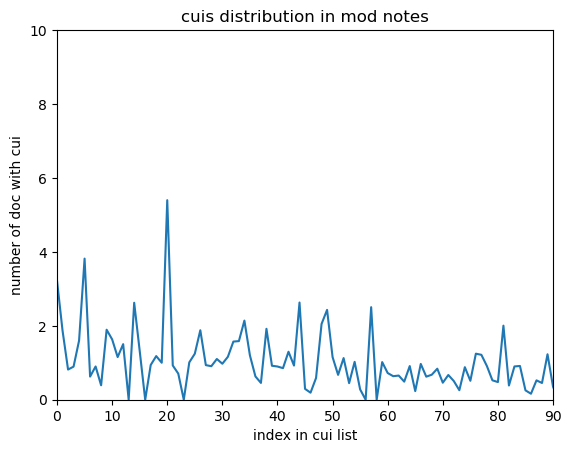

In [142]:
modcuifreq = modVector.sum(0)
plt.plot(modcuifreq)
plt.xlim([0, 90])
plt.ylim([0, 10])
plt.xlabel("index in cui list")
plt.ylabel("number of doc with cui")
plt.title("cuis distribution in mod notes")

Text(0.5, 1.0, 'cuis distribution in nomod notes')

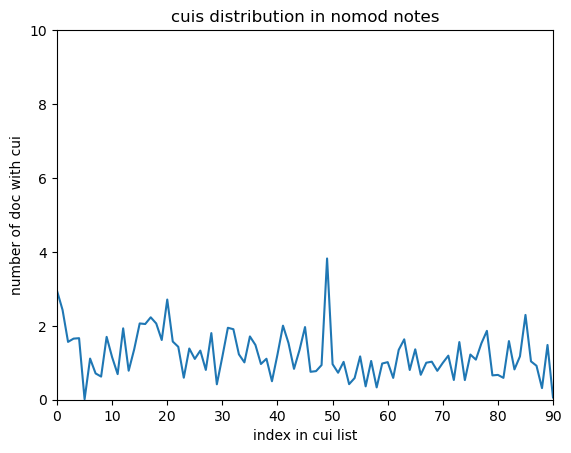

In [143]:
nomodcuifreq = nomodVector.sum(0)
plt.plot(nomodcuifreq)
plt.xlim([0, 90])
plt.ylim([0, 10])
plt.xlabel("index in cui list")
plt.ylabel("number of doc with cui")
plt.title("cuis distribution in nomod notes")

## Norm Distance of tfidf, knn on testing

In [144]:
test_allCuis = collections.Counter() # won't use this.
test_allCuis, test_mod_note_to_cuis = getAllCuisAndCuiDict(test_mod_texts, test_allCuis)
test_allCuis, test_nomod_note_to_cuis = getAllCuisAndCuiDict(test_nomod_texts, test_allCuis)

In [145]:
# allCuisList, cuiToIndex
test_bagOfCuisCount = np.zeros((len(test_mod_texts)+len(test_nomod_texts), len(allCuisList)))
test_bagOfCuisExist = np.zeros((len(test_mod_texts)+len(test_nomod_texts), len(allCuisList)))
test_bagOfCuisCount, test_bagOfCuisExist = populateWordCountAndExistence(test_bagOfCuisCount, test_bagOfCuisExist, test_mod_note_to_cuis)
test_bagOfCuisCount, test_bagOfCuisExist = populateWordCountAndExistence(test_bagOfCuisCount, test_bagOfCuisExist, test_nomod_note_to_cuis, len(test_mod_note_to_cuis))

In [146]:
print(len(test_mod_texts)+len(test_nomod_texts))

38


In [147]:
def gettestTFIDF(test_bagOfCuisCount, test_bagOfCuisExist):
    rows = len(test_mod_texts) + len(test_nomod_texts)
    train_rows = len(mod_texts) + len(nomod_texts)
    cols = len(allCuisList)
    tfidf = np.zeros((rows, cols))
    for i in range(rows):
        totalInDoc = test_bagOfCuisCount[i].sum() # total cuis in current doc
        for j in range(cols):
            tfidf[i][j] = test_bagOfCuisCount[i][j] / (totalInDoc + 0.000001) * np.log(train_rows/(DocWithWordx[j] + 0.000001))
    return tfidf   

In [148]:
test_tfidfVector = gettestTFIDF(test_bagOfCuisCount, test_bagOfCuisExist)
print(np.shape(test_tfidfVector))

(38, 94)


In [149]:
# bagOfCuisVector: 185 x 84
def getTopKClosest(standardNoteIndex, k):
    standard = test_tfidfVector[standardNoteIndex]
    minD = float('inf')
    closestVecIndex = 0
    indexToDis = {}
    for i in range(len(tfidfVector)): # 185
        vector = tfidfVector[i]
        curD = np.linalg.norm(vector - standard)
        indexToDis[i] = curD
    
    return sorted(indexToDis.items(), key = lambda item: item[1])[:k]

closest = getTopKClosest(0, 5)
print(closest)
closest = getTopKClosest(1, 5)
print(closest)
closest = getTopKClosest(2, 5)
print(closest)

[(19, 0.2593018161865728), (28, 0.2593018161865728), (66, 0.2593018161865728), (70, 0.2593018161865728), (85, 0.2593018161865728)]
[(71, 0.39547646434137124), (78, 0.4038746627213841), (19, 0.4201633550757545), (28, 0.4201633550757545), (66, 0.4201633550757545)]
[(63, 0.44004779827076435), (112, 0.5936800231270847), (111, 0.7450086338192776), (99, 0.8108218781650998), (127, 0.8113184468230269)]


In [163]:
modnomodC = []
for note in range(38):
    closest = getTopKClosest(note, 5)
    mod = np.sum([1 if c[0] < 69 else 0 for c in closest])
    nomod = np.sum([1 if c[0] >= 69 else 0 for c in closest])
    modnomodC += [(mod, nomod)]

In [164]:
print(modnomodC)

[(3, 2), (3, 2), (1, 4), (3, 2), (1, 4), (3, 2), (1, 4), (3, 2), (2, 3), (3, 2), (4, 1), (4, 1), (1, 4), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (3, 2), (2, 3), (3, 2), (3, 2), (2, 3), (3, 2), (4, 1), (3, 2), (3, 2), (0, 5), (4, 1), (1, 4), (3, 2), (4, 1), (3, 2), (3, 2), (4, 1), (2, 3), (1, 4)]


In [165]:
modClosestToMod = sum([1 if i > j else 0 for i, j in modnomodC[:18]])
nomodClosestToNomod = sum([1 if i < j else 0 for i, j in modnomodC[18:]])
print(modClosestToMod, "/ 18 of mod are determined as mod,", nomodClosestToNomod, "/ 20 of nomod are determined as nomod in testing")

13 / 18 of mod are determined as mod, 6 / 20 of nomod are determined as nomod in testing


In [166]:
meanmod = np.mean(tfidfVector[:69], axis = 0)
print(meanmod)

[0.04664192 0.02711823 0.01183802 0.01297296 0.0231769  0.05533007
 0.00907279 0.01304189 0.00565597 0.02745    0.0236666  0.01672219
 0.02178975 0.         0.03801895 0.01917176 0.         0.01362384
 0.01710714 0.01449633 0.07824415 0.01343914 0.01023368 0.
 0.0146535  0.01803209 0.02725291 0.01357047 0.01314516 0.01596761
 0.01411361 0.01682569 0.02279871 0.02298485 0.03102483 0.01738895
 0.00913053 0.00658712 0.02780637 0.01331508 0.01302861 0.01238118
 0.01881532 0.01339175 0.0381156  0.00425935 0.00275459 0.00852459
 0.02971197 0.03522916 0.01671991 0.00974745 0.01632658 0.00649651
 0.01485295 0.00404599 0.         0.03629013 0.         0.01475466
 0.01046044 0.00922966 0.00947184 0.0070948  0.01319773 0.00337344
 0.01403475 0.00904076 0.00981102 0.01216123 0.00667    0.00969748
 0.0073153  0.00373023 0.01276019 0.00742153 0.01805468 0.01761033
 0.01321059 0.00761546 0.00692041 0.02903941 0.00557114 0.01304988
 0.01323478 0.00367696 0.00234513 0.00759392 0.00655743 0.01783081
 0.

In [167]:
meannomod = np.mean(tfidfVector[69:], axis = 0)
print(meannomod)

[0.03776878 0.03117218 0.02006069 0.02119173 0.02134568 0.0001782
 0.01427555 0.0091203  0.00802816 0.02180846 0.01473041 0.00887875
 0.02475695 0.01006132 0.01747768 0.02645841 0.02625764 0.02858736
 0.02644301 0.02071433 0.03474535 0.02018446 0.01835392 0.0076296
 0.01776557 0.01415434 0.01703896 0.01033565 0.02310715 0.00535389
 0.01493466 0.02495605 0.02445906 0.01574882 0.01295164 0.02195143
 0.0189903  0.01238984 0.01421581 0.00641351 0.01567389 0.02568638
 0.01966146 0.01070985 0.01724735 0.02521056 0.00968343 0.00992108
 0.01201594 0.04899778 0.0123385  0.00936383 0.01313216 0.00539531
 0.00752195 0.01502999 0.00462915 0.01344972 0.00427135 0.01255398
 0.01303493 0.00756795 0.01729577 0.02094774 0.01031298 0.01748196
 0.008648   0.01282777 0.01320011 0.010026   0.01278863 0.01528729
 0.00683802 0.01999439 0.00680851 0.01567281 0.01390958 0.0195427
 0.02388829 0.00844128 0.00861025 0.00758433 0.0203476  0.01051591
 0.01504477 0.02940977 0.01330256 0.01178105 0.00402213 0.0189936

In [156]:
print(allCuisList)

['patient', 'day', 'tablet', 'tab', 'medication', '/', 'mouth', 'refill', 'supply', 'pain', 'negative', 'expiration', 'report', 'release', 'review', 'pulse', '|', 'eval', 'deny', 'month', 'veteran', 'male', 'plan', 'qty', 'intact', 'skin', 'symptom', 'week', 'stable', 'outpt', 'year', 'level', 'alert', 'time', 'discharge', 'p', 'treatment', 'test', 'state', 'daily', 'specimen', 'answer', 'blood pressure', 'change', 'admission', 'blood', 'provider', 'collection', 'risk', 'nurse', 'lab', 'soft', 'history', 'active', 'hyperlipidemia', 'dose', 'status active', 'result', 'status discontinue', 'problem', 'unit', 'hour', 'htn', 'evaluation', 'date', 'mmol', 'mild', 'response', 'pcp', 'hypertension', 'increase', 'eye', 'egfr', 'urine', 'moderate', 'fever', 'diagnosis', 'admit', 'resp', 'evidence', 'allergy', 'stroke', 'assessment', 'lung', 'caregiver', 'neg', 'auto', '9', 'heart', 'respiration', 'atrial fibrillation', 'aneurysm', 'smoke', 'head trauma']


## save to csv

In [168]:
meanmod_df = pd.DataFrame(meanmod)
meanmod_df.to_csv('mod_mean_tfidf_n.csv')
meannomod_df = pd.DataFrame(meannomod)
meannomod_df.to_csv('nomod_mean_tfidf_n.csv')

In [158]:
top_cuis_df = pd.DataFrame(allCuisList)
top_cuis_df.to_csv('top_cuis_tfidf_n.csv')

In [159]:
tfidfVector_df = pd.DataFrame(tfidfVector)
tfidfVector_df.to_csv('tfidf_n.csv')

In [160]:
doc_w_word_x_df = pd.DataFrame(DocWithWordx)
doc_w_word_x_df.to_csv('word_count_train_corpus_n.csv')